In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import warnings

warnings.simplefilter(action="ignore")


In [ ]:
# Load the dataset
data = pd.read_csv('/content/fetal_health.csv')

# Display the first few rows to get an overview of the data
# print(data.head())
print(data.shape)

(2126, 22)


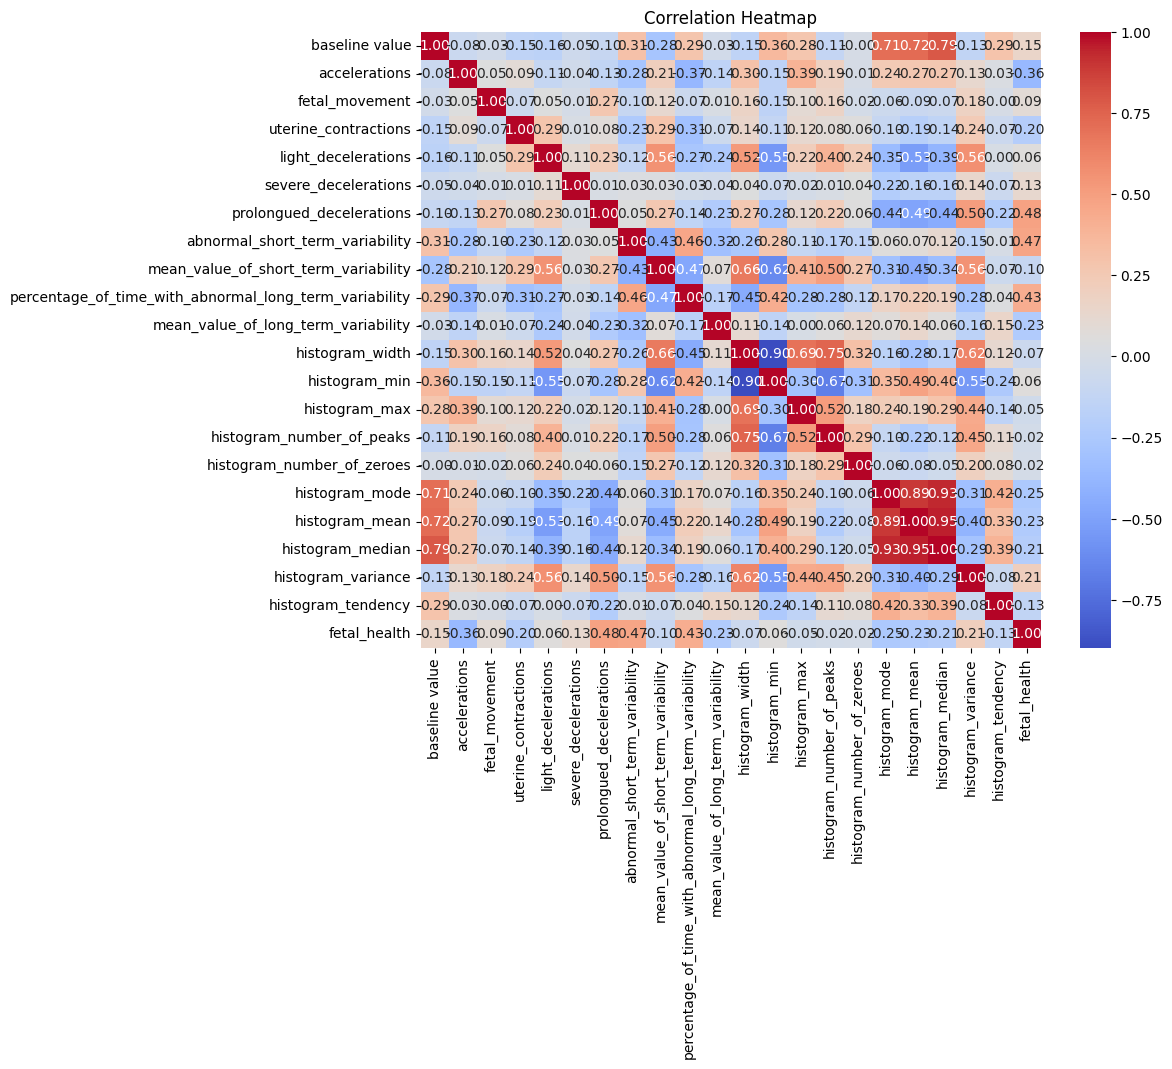

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing both features and target
# If you have different variable names, please replace them with your actual data

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Descriptive statistics
description = data.describe()

print("Descriptive statistics:")
print(description)


Descriptive statistics:
       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960             

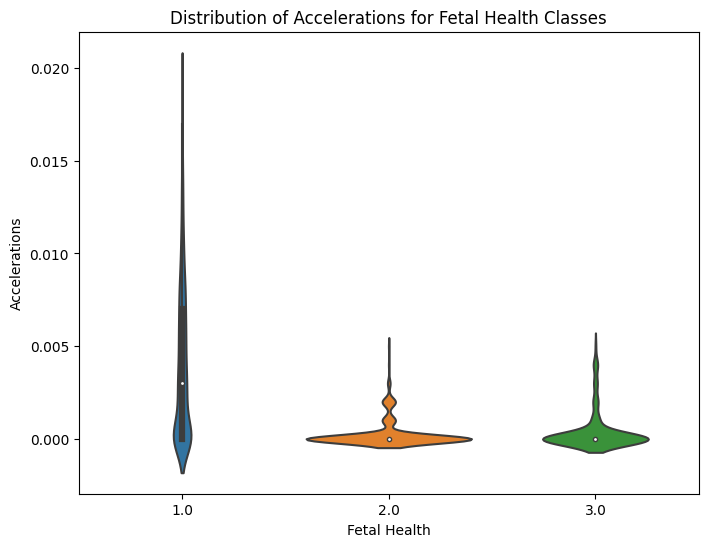

In [ ]:
# Example: Violin plot showing the distribution of accelerations for different fetal health classes
plt.figure(figsize=(8, 6))
sns.violinplot(x='fetal_health', y='accelerations', data=data)
plt.title('Distribution of Accelerations for Fetal Health Classes')
plt.xlabel('Fetal Health')
plt.ylabel('Accelerations')
plt.show()


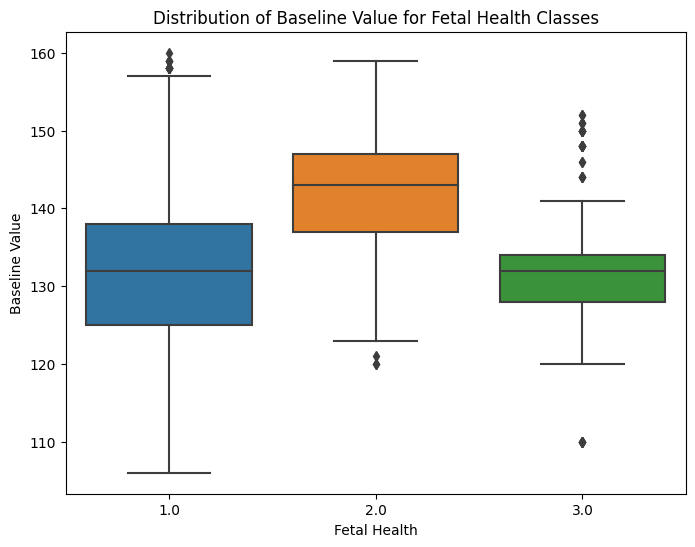

In [ ]:
# Example: Box plot showing the distribution of baseline value for different fetal health classes
plt.figure(figsize=(8, 6))
sns.boxplot(x='fetal_health', y='baseline value', data=data)
plt.title('Distribution of Baseline Value for Fetal Health Classes')
plt.xlabel('Fetal Health')
plt.ylabel('Baseline Value')
plt.show()


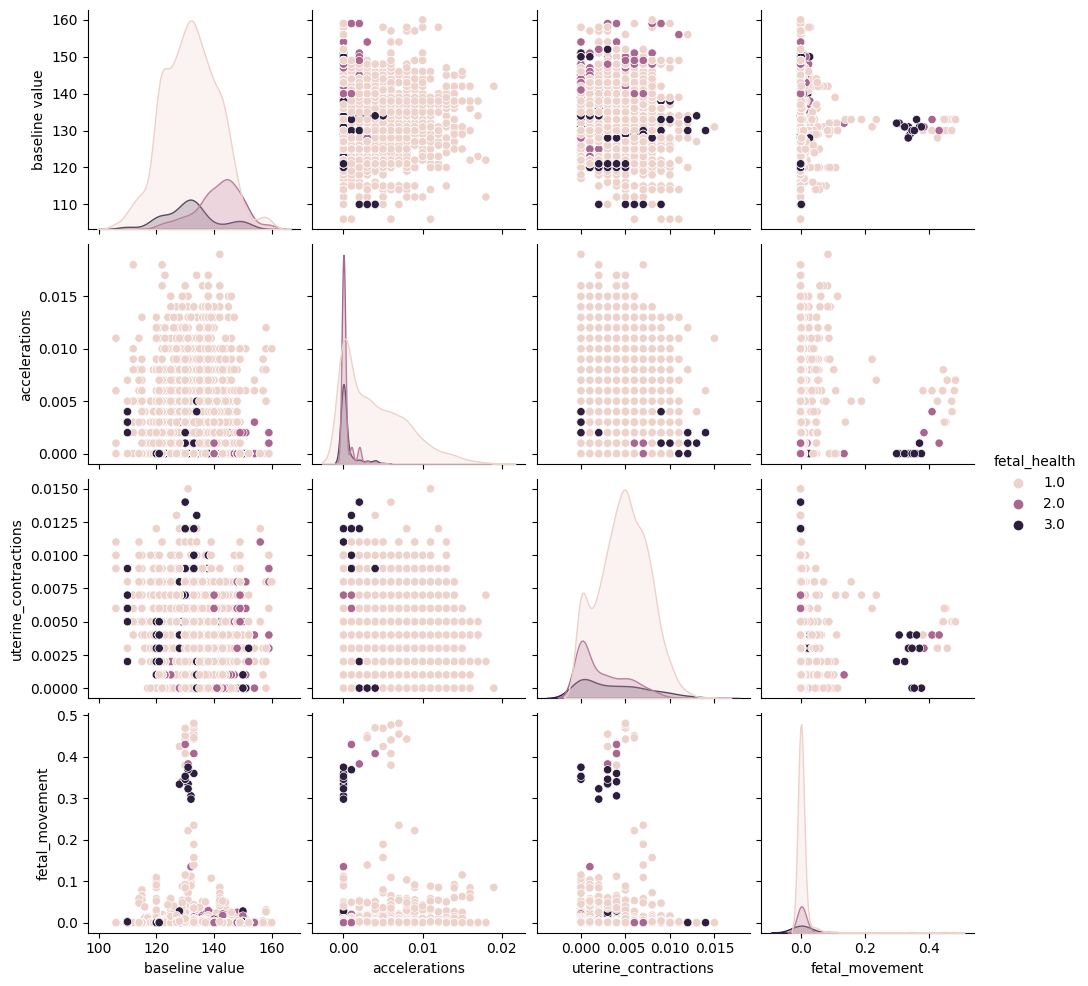

In [ ]:
# Example: Pairplot with hue for fetal health classes
columns_of_interest = ['baseline value', 'accelerations', 'uterine_contractions', 'fetal_movement', 'fetal_health']
sns.pairplot(data[columns_of_interest], hue='fetal_health')
plt.show()


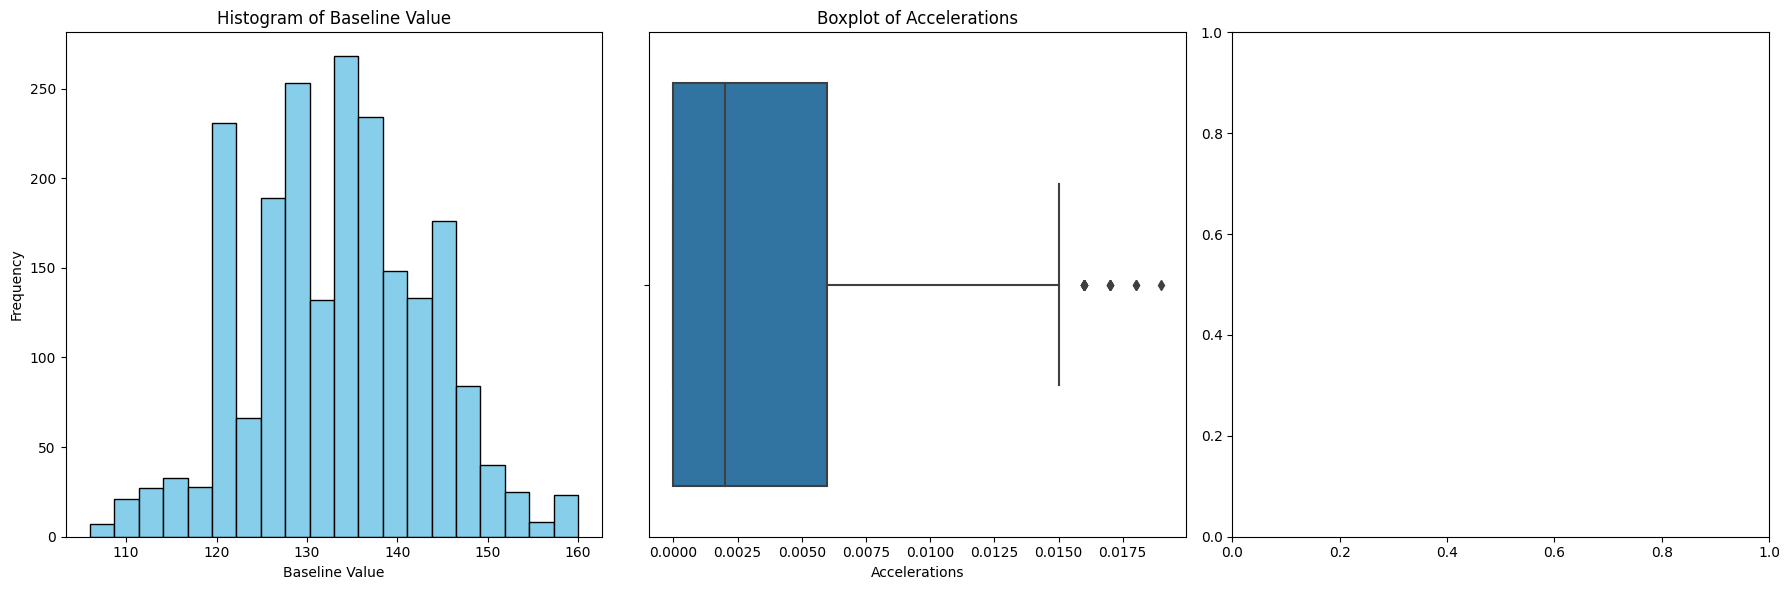

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram
axes[0].hist(data['baseline value'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Baseline Value')
axes[0].set_xlabel('Baseline Value')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(x=data['accelerations'], ax=axes[1])
axes[1].set_title('Boxplot of Accelerations')
axes[1].set_xlabel('Accelerations')


plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


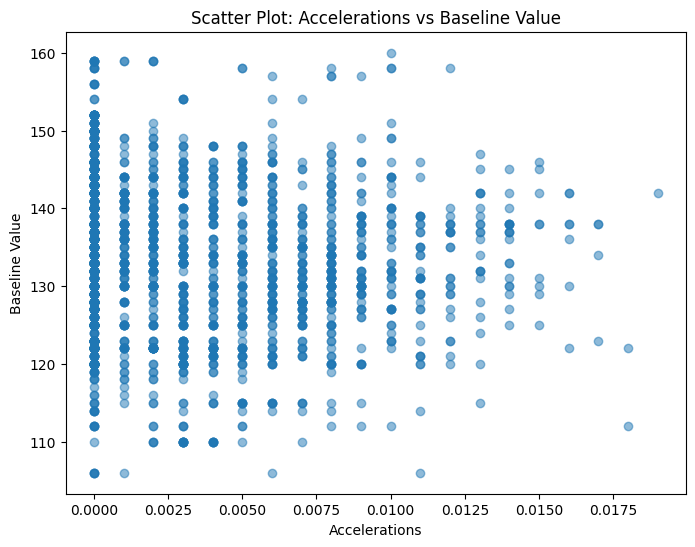

In [ ]:
import matplotlib.pyplot as plt

# Example: Scatter plot between 'accelerations' and 'baseline value'
plt.figure(figsize=(8, 6))
plt.scatter(data['accelerations'], data['baseline value'], alpha=0.5)
plt.title('Scatter Plot: Accelerations vs Baseline Value')
plt.xlabel('Accelerations')
plt.ylabel('Baseline Value')
plt.show()


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset
# Replace 'df' with the name of your DataFrame

# Check for null values in each column
null_counts = data.isnull().sum()

print("Null value counts in each column:")
print(null_counts)


Null value counts in each column:
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histog

In [ ]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [ ]:
# data = data.drop(['histogram_min', 'histogram_median' , 'histogram_mode'] , axis = 1)


In [ ]:
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [ ]:
#split the data

X  = data.drop(['fetal_health'] , axis=1)
y = data['fetal_health']

In [ ]:
data['fetal_health'].unique()

array([2., 1., 3.])

In [ ]:
from collections import Counter

counter = Counter(y)
for k, v in counter.items():
  dist = v/len(y)*100
  print(f"class={k}, n = {v} ({dist}%)")

class=2.0, n = 295 (13.8758231420508%)
class=1.0, n = 1655 (77.84571966133585%)
class=3.0, n = 176 (8.27845719661336%)


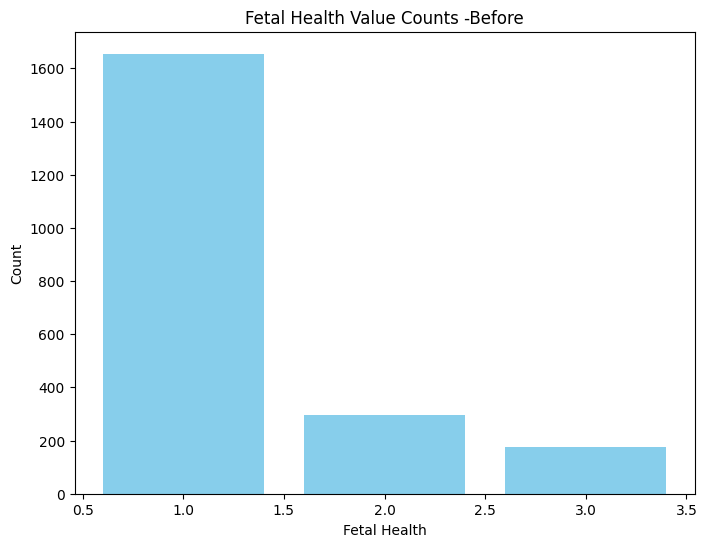

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Assuming you have already calculated the counter
counter = Counter(y)

# Extract class labels and counts
classes = list(counter.keys())
counts = list(counter.values())

# Plot histogram
plt.figure(figsize=(8, 6))
plt.bar(classes, counts, color='skyblue')
plt.title('Fetal Health Value Counts -Before')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X , y = oversample.fit_resample(X , y)

In [ ]:
from collections import Counter

counter = Counter(y)
for k, v in counter.items():
  dist = v/len(y)*100
  print(f"class={k}, n = {v} ({dist}%)")

class=2.0, n = 1655 (33.33333333333333%)
class=1.0, n = 1655 (33.33333333333333%)
class=3.0, n = 1655 (33.33333333333333%)


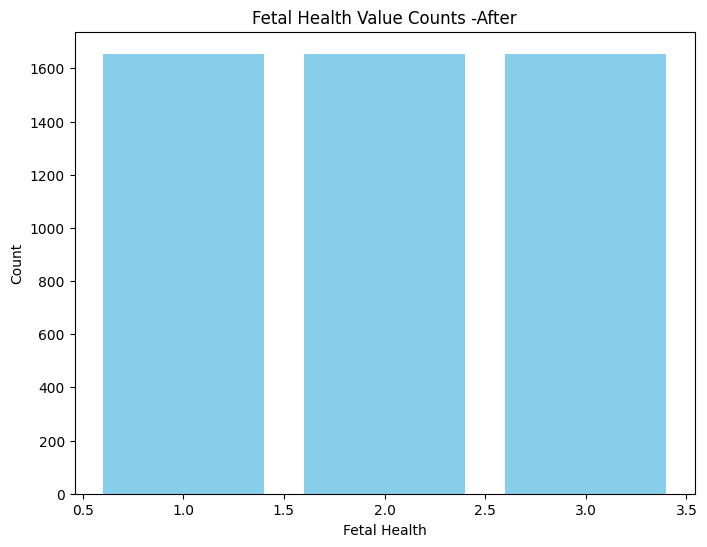

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Assuming you have already calculated the counter
counter = Counter(y)

# Extract class labels and counts
classes = list(counter.keys())
counts = list(counter.values())

# Plot histogram
plt.figure(figsize=(8, 6))
plt.bar(classes, counts, color='skyblue')
plt.title('Fetal Health Value Counts -After')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size =.25 , random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the resampled data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Confusion Matrix and Classification Report
confusion_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier Accuracy:", accuracy_rf)
print("\nRandom Forest Classifier Confusion Matrix:")
print(confusion_rf)
print("\nRandom Forest Classifier Classification Report:")
print(report_rf)
print("\n")


Random Forest Classifier Accuracy: 0.9702093397745571

Random Forest Classifier Confusion Matrix:
[[408  22   3]
 [  4 395   5]
 [  1   2 402]]

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

         1.0       0.99      0.94      0.96       433
         2.0       0.94      0.98      0.96       404
         3.0       0.98      0.99      0.99       405

    accuracy                           0.97      1242
   macro avg       0.97      0.97      0.97      1242
weighted avg       0.97      0.97      0.97      1242





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Logistic Regression model
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the resampled data
lr_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_classifier.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Confusion Matrix and Classification Report
confusion_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression Classifier Accuracy:", accuracy_lr)
print("\nLogistic Regression Classifier Confusion Matrix:")
print(confusion_lr)
print("\nLogistic Regression Classifier Classification Report:")
print(report_lr)
print("\n")


Logistic Regression Classifier Accuracy: 0.8188405797101449

Logistic Regression Classifier Confusion Matrix:
[[338  83  12]
 [ 50 321  33]
 [  4  43 358]]

Logistic Regression Classifier Classification Report:
              precision    recall  f1-score   support

         1.0       0.86      0.78      0.82       433
         2.0       0.72      0.79      0.75       404
         3.0       0.89      0.88      0.89       405

    accuracy                           0.82      1242
   macro avg       0.82      0.82      0.82      1242
weighted avg       0.82      0.82      0.82      1242





In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the resampled data
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Confusion Matrix and Classification Report
confusion_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Classifier Accuracy:", accuracy_dt)
print("\nDecision Tree Classifier Confusion Matrix:")
print(confusion_dt)
print("\nDecision Tree Classifier Classification Report:")
print(report_dt)
print("\n")


Decision Tree Classifier Accuracy: 0.9589371980676329

Decision Tree Classifier Confusion Matrix:
[[406  26   1]
 [ 13 387   4]
 [  2   5 398]]

Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       433
         2.0       0.93      0.96      0.94       404
         3.0       0.99      0.98      0.99       405

    accuracy                           0.96      1242
   macro avg       0.96      0.96      0.96      1242
weighted avg       0.96      0.96      0.96      1242





In [ ]:
# Encode target variable for XGBoost
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize and train XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train_encoded)

# Predict and evaluate on test set
y_pred_xgb = xgb_model.predict(X_test)
test_accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
xgb_confusion = confusion_matrix(y_test_encoded, y_pred_xgb)
xgb_report = classification_report(y_test_encoded, y_pred_xgb)

# Print test set results
print("XGBoost Test Accuracy:", test_accuracy_xgb)
print("\nXGBoost Confusion Matrix:")
print(xgb_confusion)
print("\nXGBoost Classification Report:")
print(xgb_report)

# Predict and evaluate on training set
y_pred_train_xgb = xgb_model.predict(X_train)
train_accuracy_xgb = accuracy_score(y_train_encoded, y_pred_train_xgb)

print("\n-----------------------------------------\n")

# Print training set results
print("XGBoost Training Accuracy:", train_accuracy_xgb)

XGBoost Test Accuracy: 0.9782608695652174

XGBoost Confusion Matrix:
[[415  16   2]
 [  5 396   3]
 [  0   1 404]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       433
           1       0.96      0.98      0.97       404
           2       0.99      1.00      0.99       405

    accuracy                           0.98      1242
   macro avg       0.98      0.98      0.98      1242
weighted avg       0.98      0.98      0.98      1242


-----------------------------------------

XGBoost Training Accuracy: 0.9997313994090787


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Encode target variable for AdaBoost
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize and train AdaBoost model
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train_encoded)

# Predict and evaluate
y_pred_ada = ada_model.predict(X_test)
ada_accuracy = ada_model.score(X_test, y_test_encoded)

# Confusion Matrix
ada_confusion = confusion_matrix(y_test_encoded, y_pred_ada)

# Classification Report
ada_report = classification_report(y_test_encoded, y_pred_ada)

# Print Results
print("AdaBoost Accuracy:", ada_accuracy)
print("\nAdaBoost Confusion Matrix:")
print(ada_confusion)
print("\nAdaBoost Classification Report:")
print(ada_report)


AdaBoost Accuracy: 0.926731078904992

AdaBoost Confusion Matrix:
[[382  49   2]
 [ 26 377   1]
 [  3  10 392]]

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       433
           1       0.86      0.93      0.90       404
           2       0.99      0.97      0.98       405

    accuracy                           0.93      1242
   macro avg       0.93      0.93      0.93      1242
weighted avg       0.93      0.93      0.93      1242



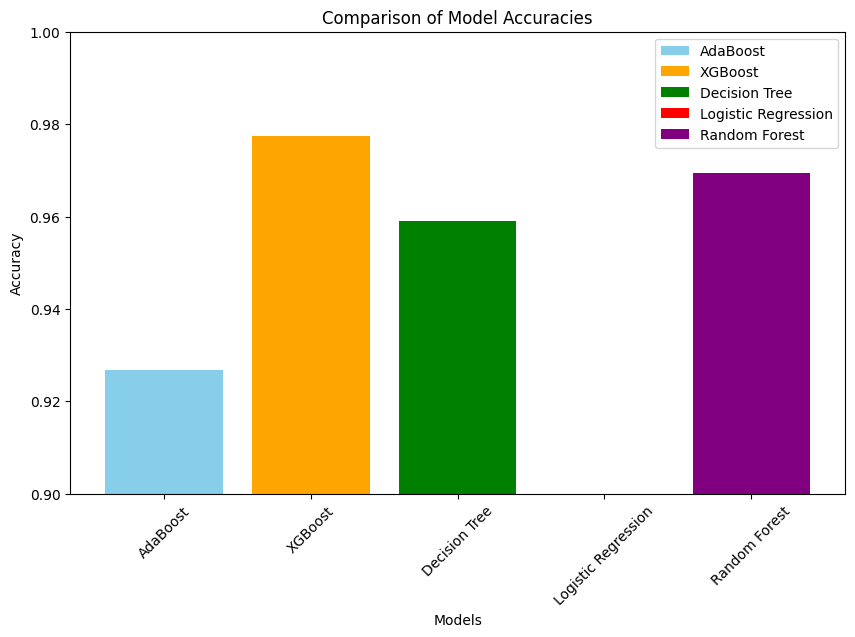

In [ ]:
import matplotlib.pyplot as plt

# List of model names and their accuracies
model_names = ['AdaBoost', 'XGBoost', 'Decision Tree', 'Logistic Regression', 'Random Forest']
accuracies = [ada_accuracy, xgb_accuracy, accuracy_dt, accuracy_lr, accuracy_rf]

# Define colors for each model
colors = ['skyblue', 'orange', 'green', 'red', 'purple']

# Plotting the bar plot
plt.figure(figsize=(10, 6))

# Iterate through each model and plot its accuracy
for i, (model, acc, color) in enumerate(zip(model_names, accuracies, colors)):
    plt.bar(model, acc, color=color, label=model)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.9, 1)  # Set y-axis limits from 0.9 to 1 (90% to 100% accuracy)
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Define the list of custom inputs
custom_inputs =[

    [128, 0, 0, 0.003, 0, 0, 0, 86, 0.3, 79, 2.9, 16, 114, 130, 0, 0, 128, 126, 129, 0, 1],
    [124, 0, 0, 0, 0, 0, 0, 86, 0.3, 72, 4, 12, 118, 130, 1, 0, 124, 124, 125, 0, 0],
    [124, 0, 0, 0, 0, 0, 0, 86, 0.4, 14, 4.8, 24, 122, 146, 1, 0, 126, 126, 127, 0, -1],
    [124, 0, 0, 0, 0, 0, 0, 87, 0.2, 71, 3.4, 10, 118, 128, 0, 0, 124, 123, 125, 0, 0], # all 3's here
    #all 1's here
    [132, 0, 0.108, 0.002, 0.01, 0, 0, 26, 4.5, 0, 12.5, 149, 50, 199, 9, 0, 133, 120, 126, 56, 0],
    [132, 0, 0.112, 0.004, 0.014, 0, 0, 22, 6.9, 0, 6.3, 149, 50, 199, 10, 0, 123, 112, 115, 66, 0],
    [132, 0, 0.089, 0.001, 0.01, 0, 0, 29, 2.9, 0, 15.1, 144, 50, 194, 11, 1, 133, 124, 130, 35, 0],
    [120, 0.008, 0.103, 0.001, 0.001, 0, 0, 28, 3.4, 0, 21.7, 126, 55, 181, 13, 0, 121, 124, 126, 25, 0],
    [120, 0.009, 0.085, 0.002, 0.002, 0, 0, 28, 3.2, 0, 12.4, 128, 53, 181, 9, 1, 129, 125, 127, 25, 0],
    [120, 0.006, 0.109, 0.007, 0, 0, 0, 27, 3.7, 0, 24.2, 144, 51, 195, 11, 0, 125, 124, 126, 24, 0],
    [115, 0.005, 0.079, 0.005, 0.003, 0, 0, 23, 3.4, 0, 18.8, 130, 52, 182, 9, 0, 119, 116, 118, 21, 0],
    [114, 0.005, 0, 0.005, 0.003, 0, 0, 24, 3.2, 0, 16.2, 134, 52, 186, 8, 0, 117, 115, 117, 19, 0],
    [115, 0.006, 0.065, 0.004, 0.001, 0, 0, 22, 3.6, 0, 19.6, 138, 50, 188, 8, 0, 117, 117, 119, 21, 0],
    [115, 0.009, 0.055, 0.005, 0, 0, 0, 27, 2.3, 0, 12.4, 129, 53, 182, 7, 0, 119, 120, 120, 14, 0],
    [114, 0.008, 0.058, 0.007, 0.001, 0, 0, 28, 2.2, 0, 12.2, 98, 55, 153, 7, 1, 119, 119, 120, 13, 0],
    [114, 0.006, 0.047, 0.009, 0, 0, 0, 27, 2.4, 0, 13.5, 128, 54, 182, 6, 0, 119, 118, 119, 13, 0],
    #all 2's here
    [146, 0, 0.006, 0, 0, 0, 0, 69, 0.5, 45, 11, 42, 117, 159, 6, 0, 153, 150, 152, 3, 1],
    [146, 0, 0.004, 0, 0, 0, 0, 76, 0.3, 58, 4.4, 18, 135, 153, 2, 0, 150, 149, 151, 0, 1],
    [146, 0, 0.007, 0, 0, 0, 0, 65, 0.5, 32, 9.5, 33, 133, 166, 4, 0, 153, 151, 154, 1, 0],
    [146, 0, 0.014, 0, 0, 0, 0, 72, 0.3, 41, 6.9, 35, 120, 155, 4, 0, 147, 146, 148, 0, 1],
    [146, 0, 0.006, 0, 0, 0, 0, 77, 0.3, 61, 5.7, 29, 120, 149, 4, 0, 147, 146, 147, 0, 1],
    [146, 0, 0.021, 0, 0, 0, 0, 68, 0.3, 23, 7.2, 20, 136, 156, 1, 0, 147, 147, 148, 1, 0],
    [150, 0, 0.022, 0, 0, 0, 0, 74, 0.3, 56, 6.4, 25, 131, 156, 4, 0, 150, 150, 151, 0, 1]


]



# Loop through the custom inputs
for i, custom_input in enumerate(custom_inputs):
    # Reshape the input data into a 2D array
    custom_input = np.array([custom_input]).reshape(1, -1)

    # Make the prediction
    predictionrf =  xgb_model.predict(custom_input)
    print(f"Predicted Fetal Health for Data rf {i + 1}:", predictionrf[0])

Predicted Fetal Health for Data rf 1: 2
Predicted Fetal Health for Data rf 2: 2
Predicted Fetal Health for Data rf 3: 2
Predicted Fetal Health for Data rf 4: 2
Predicted Fetal Health for Data rf 5: 0
Predicted Fetal Health for Data rf 6: 0
Predicted Fetal Health for Data rf 7: 0
Predicted Fetal Health for Data rf 8: 0
Predicted Fetal Health for Data rf 9: 0
Predicted Fetal Health for Data rf 10: 0
Predicted Fetal Health for Data rf 11: 0
Predicted Fetal Health for Data rf 12: 0
Predicted Fetal Health for Data rf 13: 0
Predicted Fetal Health for Data rf 14: 0
Predicted Fetal Health for Data rf 15: 0
Predicted Fetal Health for Data rf 16: 0
Predicted Fetal Health for Data rf 17: 1
Predicted Fetal Health for Data rf 18: 1
Predicted Fetal Health for Data rf 19: 1
Predicted Fetal Health for Data rf 20: 1
Predicted Fetal Health for Data rf 21: 1
Predicted Fetal Health for Data rf 22: 1
Predicted Fetal Health for Data rf 23: 1


In [ ]:
import joblib

# Assuming `model` is your trained machine learning model
joblib.dump(xgb_model, 'fetal_health_model.pkl')


['fetal_health_model.pkl']